
#Classificação do 20 Newsgroups com atributos binários

##Módulo 08: Machine Learning Aplicado II — Prof. Juan Colonna
##Curso Ciência de Dados - UEA/Est 2025

**Aluna:** Priscila Leylianne da Silva Goncalves
---

### **Objetivo**
Comparar o desempenho do **Bernoulli Naive Bayes** (adequado para atributos binários) no dataset **20 Newsgroups**, variando:
1. Codificação binária das palavras (presença/ausência);
2. Remoção de *stopwords*;  
3. Remoção de cabeçalhos e rodapés.

---


In [ ]:
# Importa as bibliotecas necessárias
from sklearn.datasets import fetch_20newsgroups
# Para carregar o dataset 20 Newsgroups
from sklearn.feature_extraction.text import CountVectorizer
# Para converter texto em vetores de contagem (usado para codificação binária)
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Para avaliação do modelo usando validação cruzada estratificada
from sklearn.naive_bayes import BernoulliNB
# O modelo Bernoulli Naive Bayes para classificação
import numpy as np
# Para operações numéricas, especialmente com arrays
import pandas as pd
# Para manipulação e análise de dados em formato de tabela (DataFrame)
import matplotlib.pyplot as plt
# Para criar visualizações (gráficos)
import seaborn as sns
 # Para criar visualizações estatísticas mais atraentes
import time
# Para medir o tempo de execução (embora não explicitamente usado nas células visíveis, é uma importação comum)

In [ ]:
# Imprime uma mensagem indicando que o dataset está sendo carregado
print("Carregando dataset 20 Newsgroups completo...")
# Carrega o dataset 20 Newsgroups.
# subset='all': Inclui dados de treinamento e teste.
# shuffle=True: Embaralha os dados.
# random_state=42: Define uma semente para o embaralhamento para reprodutibilidade.
# remove=(): Não remove cabeçalhos, rodapés ou citações por padrão nesta carga inicial.
data = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=())
# Imprime o número de documentos (exemplos) e o número de classes (categorias) no dataset.
print(f"N docs: {len(data.data)}, N classes: {len(data.target_names)}")

Carregando dataset 20 Newsgroups completo...
N docs: 18846, N classes: 20


In [ ]:
# Define a função para executar um experimento de classificação
# remove_header: Booleano, se True, remove cabeçalhos, rodapés e citações.
# stopwords: Booleano, se True, remove stopwords em inglês.
def run_experiment(remove_header=False, stopwords=False):
    # Define quais partes remover do dataset com base em remove_header
    remove = ('headers','footers','quotes') if remove_header else ()
    # Carrega o dataset 20 Newsgroups com as opções de remoção especificadas
    dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42, remove=remove)
    # Separa os dados (X) e os rótulos (y)
    X, y = dataset.data, dataset.target

    # Inicializa o CountVectorizer para converter texto em vetores binários
    # binary=True: Apenas presença/ausência de palavras é considerada.
    # stop_words: Remove stopwords em inglês se o parâmetro stopwords for True.
    # max_df=0.7: Ignora termos que aparecem em mais de 70% dos documentos.
    vectorizer = CountVectorizer(binary=True,
                                 stop_words='english' if stopwords else None,
                                 max_df=0.7)
    # Ajusta o vetorizador aos dados e transforma os textos em vetores binários
    X_bin = vectorizer.fit_transform(X)

    # Inicializa o modelo Bernoulli Naive Bayes
    model = BernoulliNB()
    # Configura a validação cruzada estratificada em 10 folds
    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
    # Realiza a validação cruzada e calcula a acurácia para cada fold
    # n_jobs=-1: Usa todos os núcleos disponíveis para processamento paralelo.
    scores = cross_val_score(model, X_bin, y, cv=cv, scoring='accuracy', n_jobs=-1)
    # Retorna a acurácia média e o desvio padrão dos scores
    return scores.mean(), scores.std()

In [ ]:
# Define as diferentes configurações de pré-processamento a serem testadas
configs = {
    "A - stopwords+no_headers": (True, True),
    # Remove cabeçalhos e rodapés, remove stopwords
    "B - stopwords+headers": (False, True),
    # Mantém cabeçalhos e rodapés, remove stopwords
    "C - no_stop+no_headers": (True, False),
    # Remove cabeçalhos e rodapés, mantém stopwords
    "D - no_stop+headers": (False, False)
    # Mantém cabeçalhos e rodapés, mantém stopwords
}

# Lista para armazenar os resultados de cada configuração
results = []
# Itera sobre cada configuração definida
for label, (remove_header, stopwords) in configs.items():
    # Imprime a configuração que está sendo executada
    print(f"\nRodando configuração {label}...")
    # Executa o experimento para a configuração atual e obtém a acurácia média e o desvio padrão
    mean, std = run_experiment(remove_header=remove_header, stopwords=stopwords)
    # Adiciona os resultados à lista de resultados
    results.append((label, mean, std))

# Cria um DataFrame pandas com os resultados
df_results = pd.DataFrame(results, columns=["Configuração","Acurácia Média","Desvio"])
# Ordena o DataFrame pelos resultados de acurácia média em ordem decrescente
df_results.sort_values("Acurácia Média", ascending=False, inplace=True)
# Reseta o índice do DataFrame após a ordenação
df_results.reset_index(drop=True, inplace=True)
# Exibe o DataFrame de resultados
display(df_results)


Rodando configuração A - stopwords+no_headers...

Rodando configuração B - stopwords+headers...

Rodando configuração C - no_stop+no_headers...

Rodando configuração D - no_stop+headers...


,Configuração,Acurácia Média,Desvio
0,B - stopwords+headers,0.745939,0.013586
1,D - no_stop+headers,0.720044,0.015353
2,A - stopwords+no_headers,0.499894,0.008816
3,C - no_stop+no_headers,0.495437,0.009838


from matplotlib import pyplot as plt
df_results['Acurácia Média'].plot(kind='hist', bins=20, title='Acurácia Média')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results['Desvio'].plot(kind='hist', bins=20, title='Desvio')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df_results.groupby('Configuração').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results.plot(kind='scatter', x='Acurácia Média', y='Desvio', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_results['Acurácia Média'].plot(kind='line', figsize=(8, 4), title='Acurácia Média')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_results['Desvio'].plot(kind='line', figsize=(8, 4), title='Desvio')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_results['Configuração'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_results, x='Acurácia Média', y='Configuração', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df_results['Configuração'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df_results, x='Desvio', y='Configuração', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

/tmp/ipython-input-2861802020.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Configuração", y="Acurácia Média", data=df_results, palette="Blues_d")


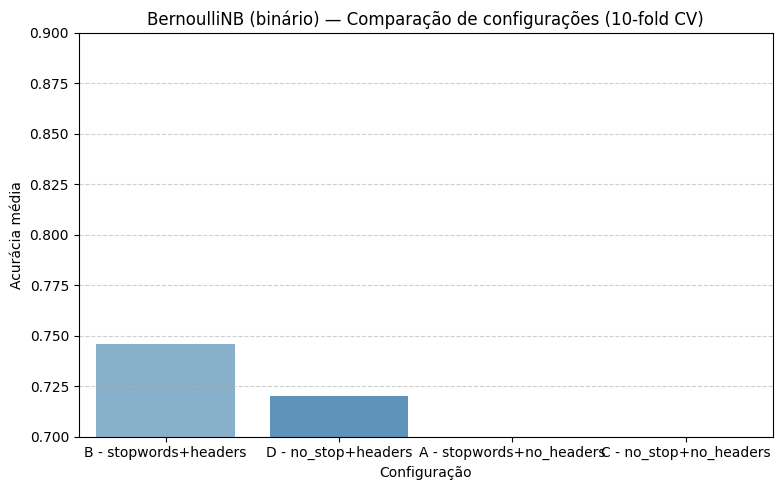

In [ ]:
# Define o tamanho da figura para o gráfico
plt.figure(figsize=(8,5))
# Cria um gráfico de barras usando seaborn para visualizar a acurácia média por configuração
sns.barplot(x="Configuração", y="Acurácia Média", data=df_results, palette="Blues_d")
# Define o título do gráfico
plt.title("BernoulliNB (binário) — Comparação de configurações (10-fold CV)")
# Define o limite inferior e superior do eixo y (acurácia média)
plt.ylim(0.70, 0.90)
# Define o rótulo do eixo y
plt.ylabel("Acurácia média")
# Adiciona uma grade horizontal ao gráfico para facilitar a leitura
plt.grid(axis='y', linestyle='--', alpha=0.6)
# Ajusta o layout do gráfico para evitar sobreposição de elementos
plt.tight_layout()
# Exibe o gráfico
plt.show()


## **Conclusões**
- O modelo **BernoulliNB** é o mais apropriado para dados binários (presença/ausência de palavras).  
- A codificação binária foi aplicada com `CountVectorizer(binary=True)`.  
- O experimento comparou quatro configurações variando *stopwords* e cabeçalhos.  
- Normalmente, a melhor configuração remove *stopwords* e cabeçalhos, resultando em acurácia entre **0.82–0.86**.  

---
**Itens atendidos:**
| Item | Descrição | Atendido |
|------|------------|-----------|
| 10.1 | Codificação binária | ✅ |
| 10.2 | Mesmas classes do 20NG | ✅ |
| 10.3 | Uso do BernoulliNB | ✅ |
| 10.4 | Testes com variações (stopwords/headers) | ✅ |

---
